# Classification

https://cloud.tencent.com/developer/article/1856561

In [1]:
from IPython.display import Image
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
# Added version check for recent scikit-learn 0.18 checks
from distutils.version import LooseVersion as Version
from sklearn import __version__ as sklearn_version
from sklearn.metrics import classification_report, confusion_matrix  
from sklearn import datasets
import numpy as np
from sklearn.model_selection import train_test_split  
from sklearn.preprocessing import StandardScaler  

In [2]:
iris = datasets.load_iris() 
#http://scikit-learn.org/stable/auto_examples/datasets/plot_iris_dataset.html
X = iris.data[:, :]
y = iris.target  #取species列，类别
print('Class labels:', np.unique(y))
#Output:Class labels: [0 1 2]

Class labels: [0 1 2]


In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.50)  
scaler = StandardScaler()  
scaler.fit(X_train)
X_train = scaler.transform(X_train)  
X_test = scaler.transform(X_test) 

## KNN K最近邻

In [30]:
from sklearn.neighbors import KNeighborsClassifier  
knn = KNeighborsClassifier(n_neighbors=5)  
knn.fit(X_train, y_train) 
y_pred = knn.predict(X_test)

In [31]:
print(confusion_matrix(y_test, y_pred))  
print(classification_report(y_test, y_pred))

[[20  0  0]
 [ 0 25  2]
 [ 0  2 26]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        20
           1       0.93      0.93      0.93        27
           2       0.93      0.93      0.93        28

    accuracy                           0.95        75
   macro avg       0.95      0.95      0.95        75
weighted avg       0.95      0.95      0.95        75



Text(0, 0.5, 'Score')

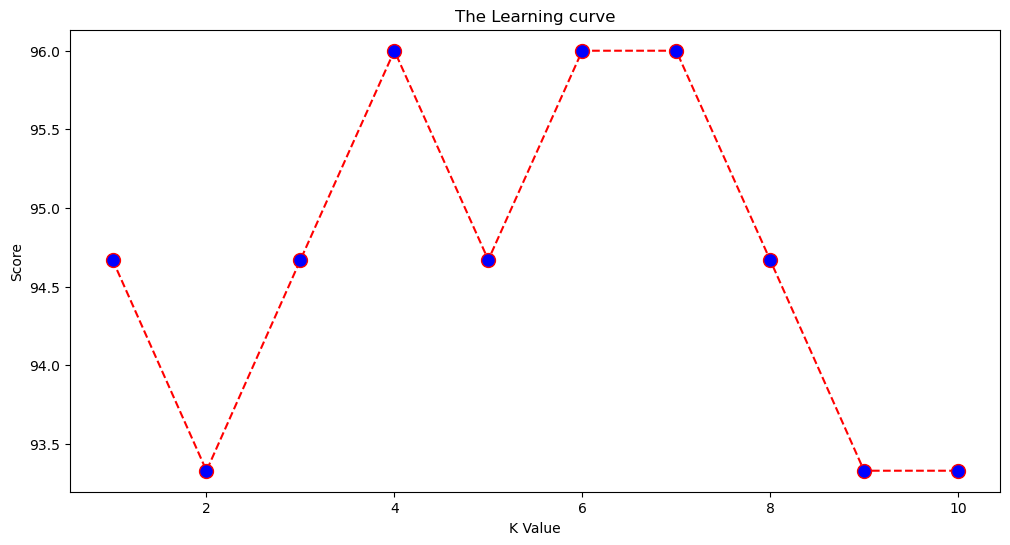

In [32]:
from sklearn.metrics import accuracy_score
score = []
for K in range(10):
    K_value = K+1
    knn = KNeighborsClassifier(n_neighbors = K_value, weights='uniform', algorithm='auto')
    knn.fit(X_train, y_train) 
    y_pred = knn.predict(X_test)
    score.append(round(accuracy_score(y_test,y_pred)*100,2))
    
plt.figure(figsize=(12, 6))  
plt.plot(range(1, 11), score, color='red', linestyle='dashed', marker='o',  
         markerfacecolor='blue', markersize=10)
plt.title('The Learning curve')  
plt.xlabel('K Value')  
plt.ylabel('Score') 

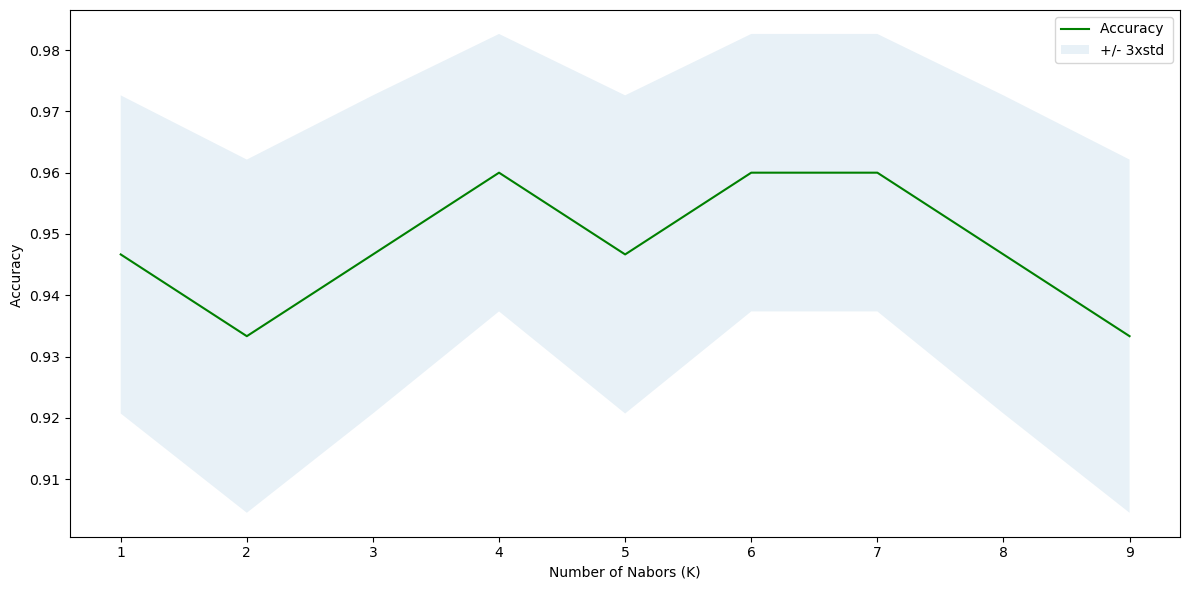

The best accuracy was with 0.96 with k= 4


In [33]:
from sklearn import metrics
Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):
    
    # 模型训练和预测
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

# 绘图
plt.figure(figsize=(12,6))
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Nabors (K)')
plt.tight_layout()
plt.show()
print( "The best accuracy was with", 
          mean_acc.max(), "with k=", 
          mean_acc.argmax()+1) 

## 逻辑回归

In [62]:
# 模型训练
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_plus,y_plus)
yhat = LR.predict(X_plus)

# predict_proba是所有类的估计值的返回，按类的标签排序。
# 第1列是第1类P(Y=1|X)的概率，第二列是第0类P(Y=0|X)的概率

yhat_prob = LR.predict_proba(X_plus)

雅卡尔指数（Jaccard index），又称为雅卡尔相似系数（Jaccard similarity coefficient），是用于比较样本集的相似性与多样性的统计量。

In [64]:
from sklearn.metrics import jaccard_score
jaccard_score(y_plus, yhat)

1.0

## 朴素贝叶斯分类器
朴素贝叶斯方程：$$P(Y|X)\propto P(Y)\prod_{i=1}^dP(X_i|Y)$$

In [7]:
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix

In [65]:
model = GaussianNB()
sss = StratifiedShuffleSplit(n_splits=3, test_size=0.50, random_state=None)
sss.get_n_splits(X_plus, y_plus)

cm_sum = np.zeros((2,2))

for train_index, test_index in sss.split(X_plus, y_plus):
    X_train, X_test = X_plus[train_index], X_plus[test_index]
    y_train, y_test = y_plus[train_index], y_plus[test_index]
    print(y_test)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    cm_sum = cm_sum + cm
print('\nNaive Bayes Gaussian Algorithms')
print('\nConfusion Matrix')
print('_'*20)
print('     Predicted')
print('     pos neg')
print('pos: %i %i' % (cm_sum[1,1], cm_sum[0,1]))
print('neg: %i %i' % (cm_sum[1,1], cm_sum[0,1]))

[1 0 0 1 1 0 1 1 0 1 1 1 0 0 1 1 1 1 0 1 1 0 0 0 0 0 1 0 1 1 0 0 0 0 1 0 0
 0 0 0 1 0 1 0 1 1 1 0 1 1]
[0 0 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 0 0 1 0 0 1 1 1 1 0 0 0 0 0 1 0 0 0
 0 1 0 1 0 1 0 0 0 1 1 0 0]
[0 0 1 1 0 0 1 0 1 0 1 0 0 1 0 1 0 1 1 0 1 0 1 0 1 1 1 1 0 0 1 1 0 0 0 1 1
 0 1 1 1 0 1 0 0 0 0 1 0 1]

Naive Bayes Gaussian Algorithms

Confusion Matrix
____________________
     Predicted
     pos neg
pos: 75 0
neg: 75 0


In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.calibration import CalibratedClassifierCV
X = dataset.drop(['Buy_Sell'], axis=1).values
Y = dataset['Buy_Sell'].values
# 创建高斯朴素贝叶斯实例
clf = GaussianNB()
# 使用sigmoid校准创建校准交叉验证
clf_sigmoid = CalibratedClassifierCV(clf, cv=2, method='sigmoid')
# 校准的概率
clf_sigmoid.fit(X, Y)
"""
CalibratedClassifierCV(base_estimator=GaussianNB(priors=None, var_smoothing=1e-09),
            cv=2, method='sigmoid')
"""

## 支持向量机

In [48]:
from sklearn.svm import SVC # "Support Vector Classifier"
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
model = SVC(kernel = 'rbf', C = 1000,gamma=0.001)
model.fit(X_train, y_train)
svc_predictions = model.predict(X_test)
print("Accuracy of SVM using optimized parameters ", accuracy_score(y_test,svc_predictions)*100)
print("Report : ", classification_report(y_test,svc_predictions))
print("Score : ",model.score(X_test, y_test))

Accuracy of SVM using optimized parameters  98.66666666666667
Report :                precision    recall  f1-score   support

           0       1.00      1.00      1.00        25
           1       1.00      0.96      0.98        25
           2       0.96      1.00      0.98        25

    accuracy                           0.99        75
   macro avg       0.99      0.99      0.99        75
weighted avg       0.99      0.99      0.99        75

Score :  0.9866666666666667


## 决策树

In [45]:
from sklearn.tree import DecisionTreeClassifier  
classifier = DecisionTreeClassifier()  
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix  
print(confusion_matrix(y_test, y_pred))  
print(classification_report(y_test, y_pred))  

[[25  0  0]
 [ 0 23  2]
 [ 0  0 25]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        25
           1       1.00      0.92      0.96        25
           2       0.93      1.00      0.96        25

    accuracy                           0.97        75
   macro avg       0.98      0.97      0.97        75
weighted avg       0.98      0.97      0.97        75



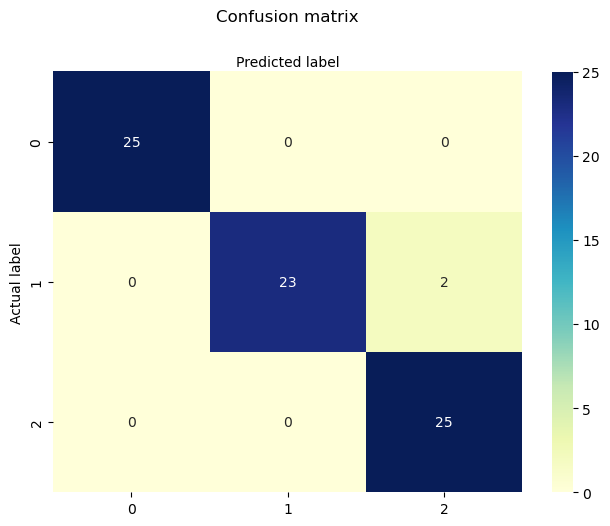

Accuracy: 0.9733333333333334


In [47]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
import pandas as pd

cm_matrix = metrics.confusion_matrix(y_test, y_pred)
cm_matrix

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cm_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

## 随机森林

In [49]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=30)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print('Accuracy Score: ', 
      accuracy_score(y_test, y_pred))
print('Accuracy Score Normalized: ',
      accuracy_score(y_test, y_pred, normalize=False))

Accuracy Score:  0.9733333333333334
Accuracy Score Normalized:  73


PU learning